Why my `nbs/sidebar.yml` file is erased when running `nbdev_prepare`?

Here is my settings.ini:

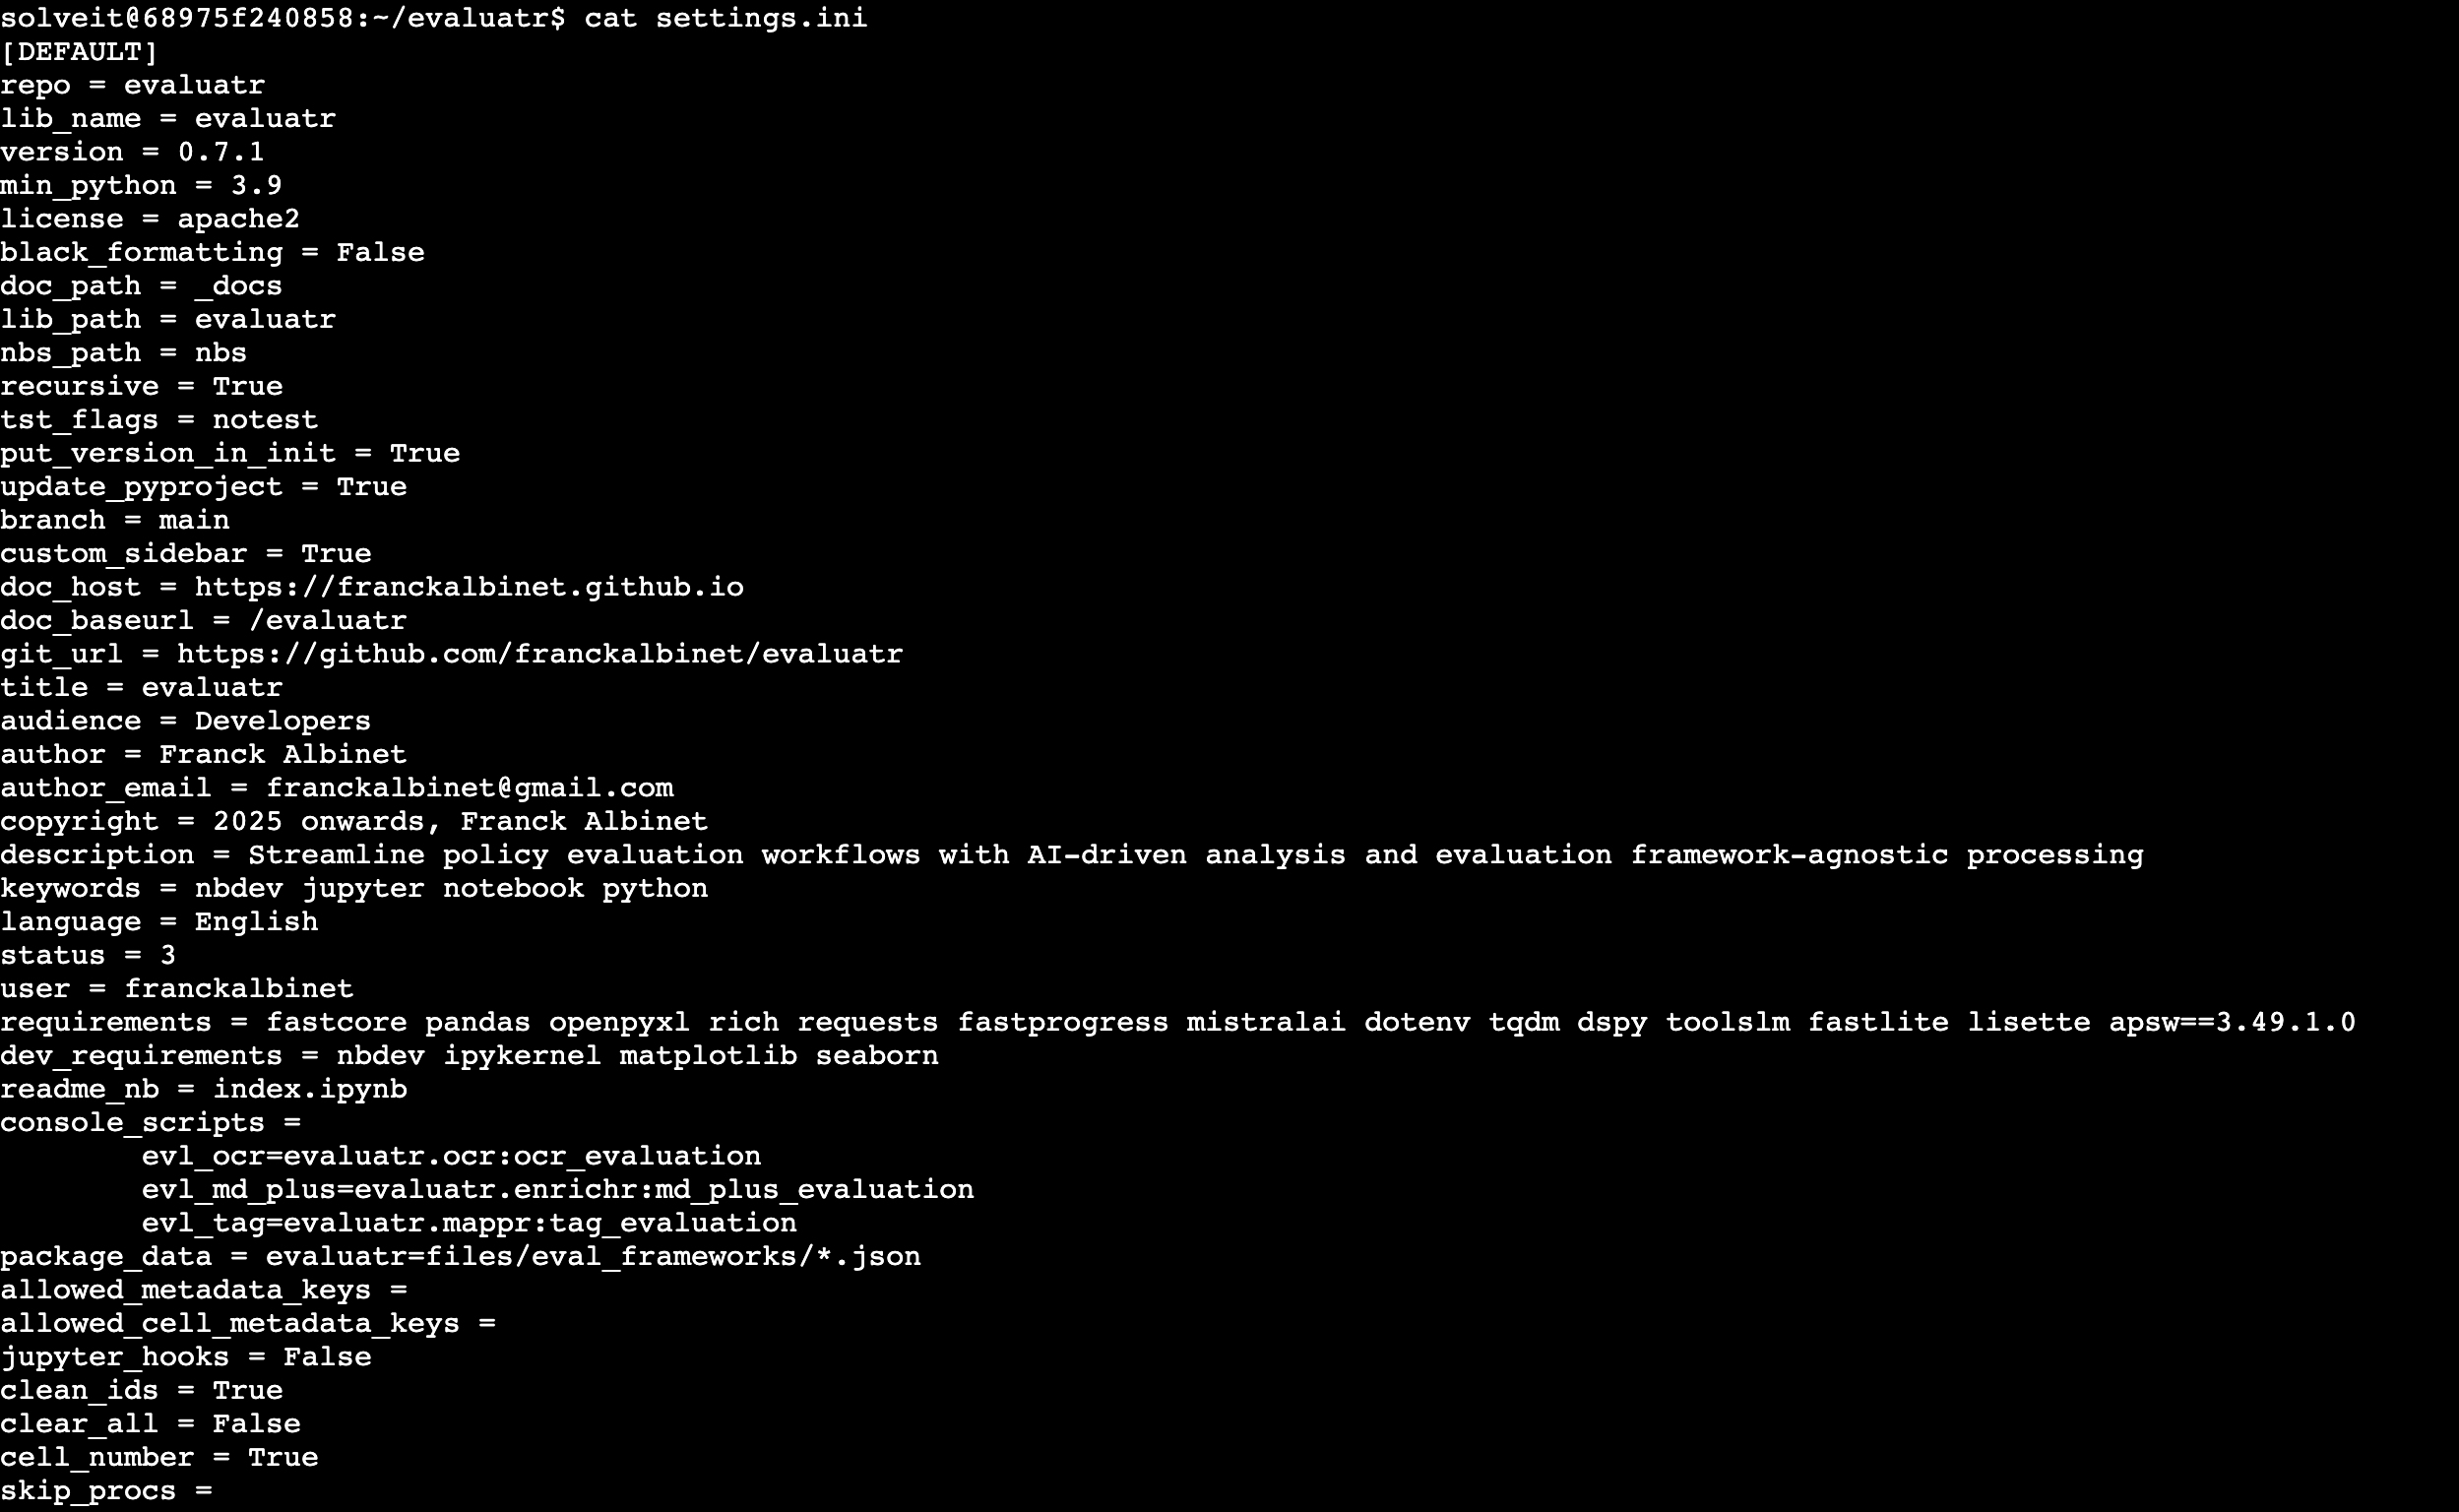


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Looking at your `settings.ini`, I can see the issue. You have:

```
custom_sidebar = True
```

When `custom_sidebar = True`, nbdev expects you to manually maintain your `sidebar.yml` and won't overwrite it. However, if the file doesn't exist or gets erased, nbdev might be regenerating it.

The problem is likely that you also have:

```
doc_host = https://francklabinet.github.io
doc_baseurl = /evaluatr/
```

But your repository structure might not match what nbdev expects. Try this:

1. Set `custom_sidebar = False` temporarily to let nbdev generate the sidebar
2. Run `nbdev_prepare`
3. Once generated, modify the sidebar as needed
4. Then set `custom_sidebar = True` again

Alternatively, if you want to keep `custom_sidebar = True`, make sure your `nbs/sidebar.yml` file exists and has valid YAML content before running `nbdev_prepare`. Even a minimal valid structure like:

```yaml
website:
  sidebar:
    contents:
      - index.ipynb
```

Would you like me to help you create a proper `sidebar.yml` structure?

# Evaluatr

> AI-Powered Evaluation Report Framework Mapping and Synthesisa

[![PyPI](https://img.shields.io/pypi/v/evaluatr)](https://pypi.org/project/evaluatr/)
[![License](https://img.shields.io/badge/license-MIT-blue.svg)](LICENSE)
[![Documentation](https://img.shields.io/badge/docs-GitHub%20Pages-blue)](https://franckalbinet.github.io/evaluatr/)

## Understanding Evaluation Mapping in the UN Context

UN evaluation work encompasses several interconnected domains:

- **Quality Check**: Assessing evidence quality and methodological rigor in evaluation reports
- **Mapping/Tagging**: Identifying which standardized framework themes are central to each report
- **Impact Evaluation**: Measuring program effectiveness using RCTs, quasi-experimental designs, etc.
- **Synthesis**: Aggregating findings across reports on specific themes/regions to generate insights

**Mapping/tagging** is a foundational step that identifies which themes from established evaluation frameworks (like IOM's Strategic Results Framework or the UN Global Compact for Migration) are *central* to each report. These frameworks provide agreed-upon nomenclature covering all relevant themes, ensuring common terminology across stakeholders and enabling interoperability for UN-wide aggregation and communication.

Rather than extracting evidence for specific themes, mapping creates a curated index enabling evaluators to retrieve the most relevant reports for subsequent synthesis work, maximizing both precision (finding all relevant reports) and recall (avoiding irrelevant ones).

::: {.callout-note}
Throughout this documentation, we use "mapping" and "tagging" interchangeably.
:::


## The Challenge We Solve

IOM evaluators possess deep expertise in mapping evaluation reports against frameworks like the Strategic Results Framework (SRF), but face significant operational challenges when processing reports that often exceed 150 pages of diverse content across multiple projects and contexts.

The core challenges are:

- **Time-intensive process**: Hundreds of staff-hours required per comprehensive mapping exercise
- **Individual consistency**: Even expert evaluators may categorize the same content differently across sessions
- **Cross-evaluator consistency**: Different evaluators may interpret and map identical content to different framework outputs
- **Scale vs. thoroughness**: Growing volume of evaluation reports creates pressure to choose between speed and comprehensive analysis

## What is Evaluatr?

`Evaluatr` is an AI-powered system that automates mapping evaluation reports against structured frameworks while maintaining interpretability and human oversight. Initially developed for [IOM (International Organization for Migration)](https://www.iom.int) evaluation reports and the [Strategic Results Framework (SRF)](https://srf.iom.int), it transforms a traditionally manual, time-intensive process into an efficient, transparent workflow.

The system maps evaluation reports against hierarchical frameworks like the SRF (objectives, enablers, cross-cutting priorities, outcomes, outputs, indicators) and connects to broader frameworks like the [Sustainable Development Goals (SDGs)](https://sdgs.un.org) for interoperability.

Beyond automation, `Evaluatr` prioritizes **interpretability and human-AI collaboration**—enabling evaluators to understand the mapping process, audit AI decisions, perform error analysis, and build training datasets over time, ensuring the system aligns with organizational needs through actionable, transparent, auditable methodology.

## Key Features

### 1. Document Preparation Pipeline ✅ **Available**

- **Repository Processing**: Read and preprocess IOM evaluation report repositories with standardized outputs
- **Automated Downloads**: Batch download of evaluation documents from diverse sources
- **OCR Processing**: Convert scanned PDFs to searchable text using Optical Character Recognition (OCR) technology
- **Content Enrichment**: Fix OCR-corrupted headings and enrich documents with AI-generated image descriptions for high-quality input data

### 2. AI-Assisted Framework Mapping ✅ **Available**

- **Multi-Stage Pipeline**: Three-stage mapping process that progressively narrows from broad themes ( SRF Enablers, Cross-cutting Priorities, GCM objectives) to specific SRF outputs. Each stage enriches context for the next—for example, knowing a report is cross-cutting in nature helps accurately map specific SRF outputs
- **Cost Optimization**: Leverages LLM prompt caching to minimize token usage and API costs during repeated analysis
- **Command-line Interface**: Streamlined pipeline execution through easy-to-use CLI tools (`evl_ocr`, `evl_md_plus`, `evl_tag`)
- **Transparent Tracing**: Complete audit trails of AI decisions stored for human review and evaluation

### 3. Knowledge Synthesis 📋 **Planned**

- **Knowledge Cards**: Generate structured summaries for downstream AI tasks like proposal writing and synthesis


## ️ Installation & Setup

::: {.callout-tip}
We recommend using isolated Python environments. [uv](https://docs.astral.sh/uv/concepts/projects/dependencies/) provides fast, reliable dependency management for Python projects.
:::

### From PyPI (Recommended)
```bash
pip install evaluatr
```

### From GitHub
```bash
pip install git+https://github.com/franckalbinet/evaluatr.git
```

### Development Installation
```bash
# Clone the repository
git clone https://github.com/franckalbinet/evaluatr.git
cd evaluatr

# Install in development mode
pip install -e .

# Make changes in nbs/ directory, then compile:
nbdev_prepare
```

::: {.callout-note}
This project uses [nbdev](https://nbdev.fast.ai) for literate programming - see the Development section for more details.
:::

### Environment Configuration

Create a `.env` file in your project root with your API keys:

```bash
MISTRAL_API_KEY="your_mistral_api_key"
GEMINI_API_KEY="your_gemini_api_key"
ANTHROPIC_API_KEY="your_anthropic_api_key"
```

**Note**: Evaluatr uses [lisette](https://lisette.answer.ai), [LiteLLM](https://www.litellm.ai) and [DSPy](https://dspy.ai) for LLM interactions, giving you flexibility to use any compatible language model provider beyond the examples above.

## Quick Start

### IOM Workflow (Programmatic)

For IOM evaluators working with the official evaluation repository, download the most recent evaluations from [evaluation.iom.int/evaluation-search-pdf](https://evaluation.iom.int/evaluation-search-pdf) as `.csv` file, then preprocess/standardize it: 

In [ ]:
from evaluatr.readers import IOMRepoReader

fname = 'files/test/evaluation-search-export-11_13_2025--18_09_44.csv'
reader = IOMRepoReader(fname)
evals = reader()
evals[0]


### EVALUATION OF IOM’S MIGRATION DATA STRATEGY
**Year:** 2025 | **Organization:** IOM | **Countries:** Worldwide

**Documents:** 2 available  
**ID:** `99923109...`



**Downloading Evaluation Documents**

```python
from evaluatr.downloaders import download_docs
from pathlib import Path

fname = 'files/test/evaluations.json'
base_dir = Path("files/test/pdf_library")
download_docs(fname, base_dir=base_dir, n_workers=0, overwrite=True)
```

### Universal CLI Workflow

Process any evaluation report from PDF to tagged outputs using three streamlined commands.

**Example:** Given a report at `example-report-dir/example-report-file.pdf`

**Step 1: OCR Processing**
```bash
evl_ocr example-report --pdf-dir . --output-dir md_library
```

**Step 2: Document Enrichment**
```bash
evl_md_plus example-report --md-dir md_library
```

**Step 3: Framework Tagging**
```bash
evl_tag example-report --md-dir md_library
```

### Detailed CLI Usage

#### `evl_ocr` - OCR Processing

Convert PDF evaluation reports to structured markdown with extracted images.

**Usage:**
```bash
evl_ocr <eval-id> [OPTIONS]
```

**Options:**

- `--pdf-dir`: Directory containing PDF folders (default: `../data/pdf_library`)
- `--output-dir`: Output directory for markdown (default: `../data/md_library`)
- `--overwrite`: Reprocess if output already exists

**Examples:**
```bash
# Basic usage
evl_ocr example-report

# Custom paths
evl_ocr example-report --pdf-dir ./reports --output-dir ./markdown

# Force reprocess
evl_ocr example-report --overwrite
```

**Output Structure:**
```
md_library/
└── example-report/
    └── example-report-file/
        ├── page_1.md
        ├── page_2.md
        └── img/
            ├── img-0.jpeg
            └── img-1.jpeg
```

#### `evl_md_plus` - Document Enrichment

Fix markdown headings hierarchy, append page numbers to each heading, and replace figures with AI-generated descriptions.

**Usage:**
```bash
evl_md_plus <eval-id> [OPTIONS]
```

**Options:**

- `--md-dir`: Directory containing markdown folders (default: `../data/md_library`)
- `--overwrite`: Reprocess if enhanced/enriched already exists

**Examples:**
```bash
# Basic usage
evl_md_plus example-report

# Force reprocess
evl_md_plus example-report --overwrite
```

**Output:** Creates `enhanced/` and `enriched/` directories with corrected headings and image descriptions.

#### `evl_tag`  [IOM only for now]

Map evaluation reports against established frameworks (SRF, GCM) using AI-assisted analysis.

**Usage:**
```bash
evl_tag <eval-id> [OPTIONS]
```

**Options:**

- `--md-dir`: Directory containing markdown folders (default: `_data/md_library`)
- `--stages`: Comma-separated stages to run (default: `1,2,3`)
  - Stage 1: SRF Enablers & Cross-cutting Priorities
  - Stage 2: GCM Objectives
  - Stage 3: SRF Outputs
- `--force-refresh`: Force refresh specific stages (comma-separated: `sections,stage1,stage2,stage3`)

**Examples:**
```bash
# Run all stages
evl_tag example-report

# Run specific stages only
evl_tag example-report --stages 1,2

# Force refresh certain stages
evl_tag example-report --force-refresh stage1,stage3

# Combined options
evl_tag example-report --stages 2,3 --force-refresh sections
```

**Output:** Results stored in `~/.evaluatr/traces/` with complete audit trails of AI decisions.

## Documentation

- **Full Documentation**: [GitHub Pages](https://franckalbinet.github.io/evaluatr/)
- **Module Notebooks** (literate programming with nbdev):
  - [OCR Processing](https://fr.anckalbi.net/evaluatr/ocr.html)
  - [Document Enrichment](https://fr.anckalbi.net/evaluatr/enrichr.html)
  - [Framework Mapping](https://fr.anckalbi.net/evaluatr/mappr.html)
- **Examples**: See the `nbs/` directory for Jupyter notebooks

## Contributing

### Development Philosophy
Evaluatr is built using [**nbdev**](https://nbdev.fast.ai), enabling documentation-driven development where code, docs, and tests live together in notebooks.

### Adding CLI Commands
We use [fastcore.script](https://fastcore.fast.ai/script.html) to create CLI tools. See the [nbdev console scripts tutorial](https://nbdev.fast.ai/tutorials/tutorial.html#advanced-functionality) for setup details.

### Development Setup

We welcome contributions! Here's how you can help:

1. **Fork** the repository

```bash
# Install development dependencies
pip install -e .

```

2. **Create** a feature branch (`git checkout -b feature/amazing-feature`)
3. **Make** your changes in the `nbs/` directory
4. **Compile** with `nbdev_prepare`
5. **Commit** your changes (`git commit -m 'Add amazing feature'`)
6. **Push** to the branch (`git push origin feature/amazing-feature`)
7. **Open** a Pull Request


## License

This project is licensed under the MIT License - see the [LICENSE](LICENSE) file for details.

## Dependencies

See [`settings.ini`](settings.ini) for the complete list of dependencies. Key packages include:

- **fastcore** & **pandas** - Core data processing
- **lisette**, **litellm** & **dspy** - AI/LLM integration
- **mistralai** - OCR processing

## Support

- **Issues**: [GitHub Issues](https://github.com/franckalbinet/evalstack/issues)
- **Discussions**: [GitHub Discussions](https://github.com/franckalbinet/evalstack/discussions)